In [1]:
import numpy as np#用于数值计算
import matplotlib.pyplot as plt#用于绘制数据可视化图表
from matplotlib import rcParams  ## run command settings for plotting用于设置图形的默认参数
import pandas as pd#提供了高性能易用的数据结构和数据分析工具，特别适用于处理结构化数据。
from sklearn.model_selection import train_test_split#用于将数据集划分为训练集和测试集，以便进行机器学习模型的训练和评估。
from sklearn.metrics import accuracy_score, precision_score, roc_curve, roc_auc_score

In [2]:
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号
    'axes.unicode_minus': False # 处理负号
}
rcParams.update(config)

In [3]:
path =r"D:\Python\data\ex2data1.txt"
data = pd.read_csv(path) ## data 是dataframe 的数据类型
data.head(10) # 返回data中的前几行数据，默认是前5行。观察数据
data.insert(0, 'ones', 1)

In [4]:
cols = data.shape[1]
X_data = data.iloc[:,:cols-1]#X是所有行，去掉最后一列， 未标准化
Y_data = data.iloc[:,cols-1:]#X是所有行，最后一列
X=X_data.values#将目标变量转换为NumPy数组，存储在X中，以便后续的矩阵运算。
Y=Y_data.values#将目标变量转换为NumPy数组，存储在Y中，以便后续的矩阵运算。
data.describe() ## 查看数据的统计信息

,ones,34.62365962451697,78.0246928153624,0
count,99.0,99.000000,99.000000,99.000000
mean,1.0,65.957614,66.102779,0.606061
std,0.0,19.302009,18.638875,0.491108
min,1.0,30.058822,30.603263,0.000000
25%,1.0,51.297736,47.978125,0.000000
50%,1.0,67.319257,66.589353,1.000000
75%,1.0,80.234877,79.876423,1.000000
max,1.0,99.827858,98.869436,1.000000


In [5]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=50)
for i in range(1, cols-1):
    max = x_train[:, i:i+1].max()
    min = x_train[:, i:i+1].min()
    x_train[:, i:i+1] = (x_train[:, i:i+1] - min) / (max - min)
    x_test[:, i:i+1] = (x_test[:, i:i+1] - min) / (max - min)

In [6]:
def sigmoid(X, W):
    return 1/(1+np.exp(-(X@W)))

In [7]:
def log_loss(X, Y, W, lambda_):
    Y_=sigmoid(X, W)
    loss=-np.sum(Y*np.log(Y_)+(1-Y)*np.log(1-Y_))/X.shape[0]
    return loss

In [8]:
def gradientDescent(X, Y, W, alpha, lambda_):
    Y_=sigmoid(X, W)
    dw=(X.T@(Y_-Y))/X.shape[0] + lambda_*W
    dw[0:1,:]=(X.T@(Y_-Y))[0:1,:]/X.shape[0]#截距不正则化
    W-=alpha*dw
    return W

In [9]:
def logicRegression(X, Y, alpha, lambda_, iters):
    Ws=[]
    W=np.zeros((X.shape[1],1))
    for i in range(iters):
        W=gradientDescent(X, Y, W, alpha, lambda_)
        wt=W.copy()
        Ws.append(wt)
    return Ws

In [10]:
def predict(X, W):
    prob = sigmoid(X, W)
    y_hat=np.array(prob>=0.5,dtype=int)
    return y_hat , prob

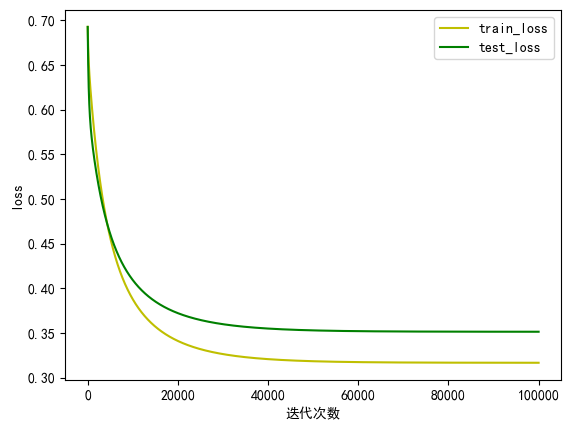

In [11]:
lambda_=0.005
alpha=0.01
iters=100000
Ws=logicRegression(x_train, y_train, alpha, lambda_, iters)
loss_his_train = []
loss_his_test = []
for w in Ws:
    loss_his_train.append(log_loss(x_train, y_train, w, lambda_))
    loss_his_test.append(log_loss(x_test, y_test, w, lambda_))
iter = np.arange(iters)
plt.plot(iter, loss_his_train,'y', label='train_loss')
plt.plot(iter, loss_his_test,'g', label='test_loss')
plt.legend()
plt.xlabel('迭代次数')
plt.ylabel('loss')
plt.show()

In [12]:
y_train_hat, y_train_prob = predict(x_train, Ws[-1])
y_test_hat, y_test_prob = predict(x_test, Ws[-1])

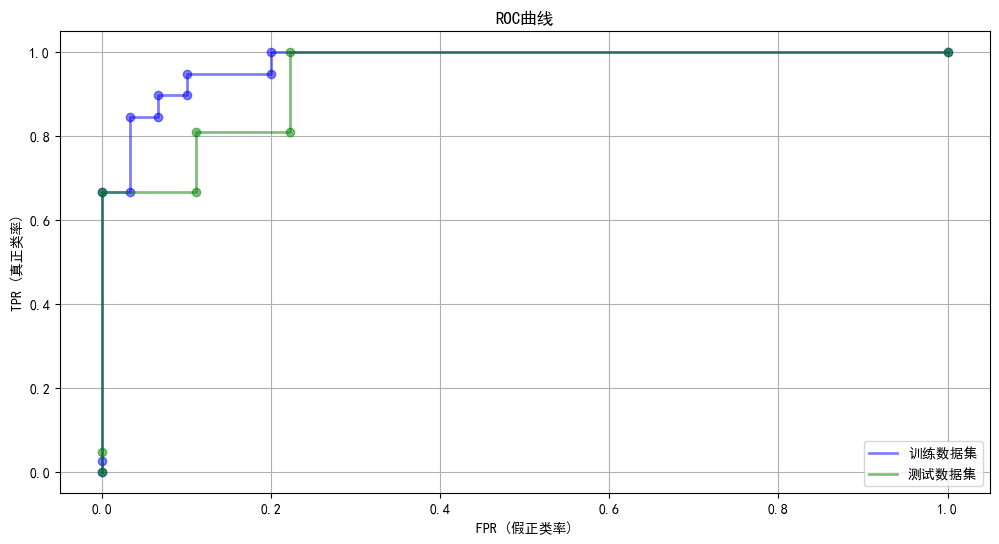

In [13]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(12, 6))
# 绘制训练集的ROC曲线
plt.plot(fpr_train, tpr_train, label='训练数据集', color='b', linestyle='-', linewidth=2, alpha=0.5)
plt.plot(fpr_train, tpr_train, 'bo', markersize=6, alpha=0.5)
plt.plot(fpr_test, tpr_test, label='测试数据集', color='g', linestyle='-', linewidth=2, alpha=0.5)
plt.plot(fpr_test, tpr_test, 'go', markersize=6, alpha=0.5)  # 使用绿色圆圈作为标记
# 设置图例和坐标轴标签
plt.legend(loc='lower right')
plt.title('ROC曲线')
plt.xlabel('FPR (假正类率)')
plt.ylabel('TPR (真正类率)')
# 显示网格
plt.grid(True)
# 显示图形
plt.show()

In [14]:
train_recall = accuracy_score(y_train,  y_train_hat)
train_prec = precision_score(y_train, y_train_hat)
test_recall = accuracy_score(y_test,  y_test_hat)
test_prec = precision_score(y_test, y_test_hat)
train_F1 = 2 * train_recall * train_prec / (train_recall + train_prec)
test_F1 = 2 * test_recall * test_prec / (test_recall + test_prec)
train_AUC = roc_auc_score(y_train, y_train_prob)
test_AUC = roc_auc_score(y_test, y_test_prob)

In [15]:
print("train_recall:", train_recall)
print("train_prec", train_prec)
print("test_recall:", test_recall)
print("test_prec", test_prec)
print("train_F1:", train_F1)
print("test_F1:", test_F1)
print("train_AUC:", train_AUC)
print("test_AUC:", test_AUC)

train_recall: 0.9130434782608695
train_prec 0.9230769230769231
test_recall: 0.8333333333333334
test_prec 0.9
train_F1: 0.9180327868852459
test_F1: 0.8653846153846153
train_AUC: 0.9752136752136753
test_AUC: 0.9417989417989419
